In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("product launch data.csv")
df


,Product_ID,Model_Name,Price (₹),Marketing_Budget (₹),Sales_Volume,Customer_Rating,RAM (GB),Battery_Capacity (mAh),Screen_Size (inches),Operating_System,Success
0,P1000,Model Y16,54638,2115793,46155,3.59,8,3000,6.5,iOS,1
1,P1001,Model K87,55332,543881,27261,2.59,12,4000,7.0,iOS,1
2,P1002,Model E56,91046,8515250,38707,3.18,16,5000,6.1,iOS,1
3,P1003,Model M94,41952,5869401,17146,4.28,6,4000,6.7,iOS,0
4,P1004,Model M97,53266,4838895,7027,3.95,8,3000,6.5,Android,0
...,...,...,...,...,...,...,...,...,...,...,...
95,P1095,Model Q40,53991,589422,47453,4.32,6,6000,6.1,Android,1
96,P1096,Model F43,43059,3673056,40926,2.58,12,5000,6.1,iOS,1
97,P1097,Model A54,91352,1248968,6261,4.10,4,3000,6.7,iOS,0
98,P1098,Model N70,77901,8429937,11057,3.13,16,6000,6.1,iOS,0


In [3]:

# Drop unnecessary columns
df = df.drop(columns=["Operating_System"], errors="ignore")

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Display dataset information
print("Data Information:")
print(df.info())

# Basic statistics
print("Data Summary:")
print(df.describe())


Missing Values:
 Product_ID                0
Model_Name                0
Price (₹)                 0
Marketing_Budget (₹)      0
Sales_Volume              0
Customer_Rating           0
RAM (GB)                  0
Battery_Capacity (mAh)    0
Screen_Size (inches)      0
Success                   0
dtype: int64
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product_ID              100 non-null    object 
 1   Model_Name              100 non-null    object 
 2   Price (₹)               100 non-null    int64  
 3   Marketing_Budget (₹)    100 non-null    int64  
 4   Sales_Volume            100 non-null    int64  
 5   Customer_Rating         100 non-null    float64
 6   RAM (GB)                100 non-null    int64  
 7   Battery_Capacity (mAh)  100 non-null    int64  
 8   Screen_Size (inches)    100 non-n

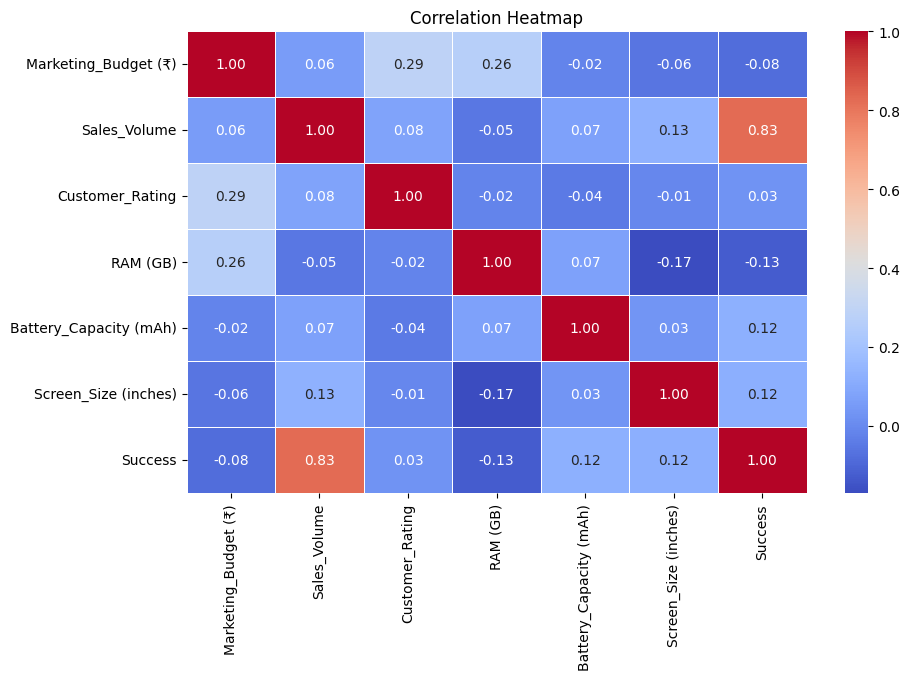

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
a=df.iloc[:,3:]
plt.figure(figsize=(10, 6))
sns.heatmap(a.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

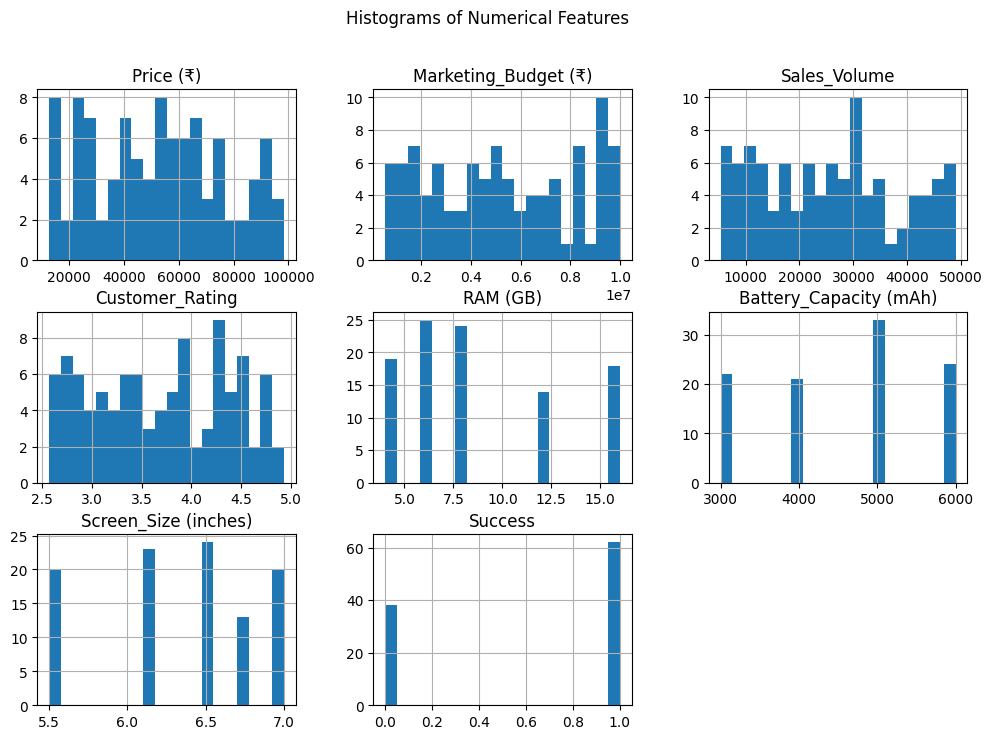

In [3]:

# Histograms for numerical features
df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()


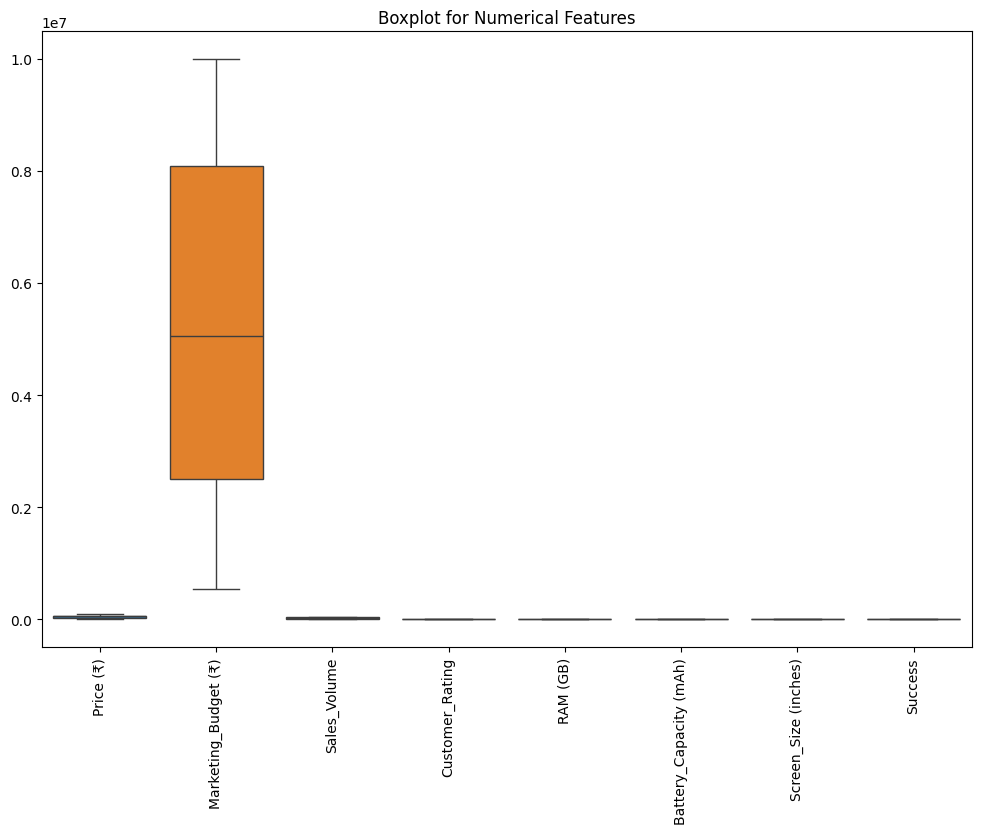

In [4]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot for Numerical Features")
plt.xticks(rotation=90)
plt.show()

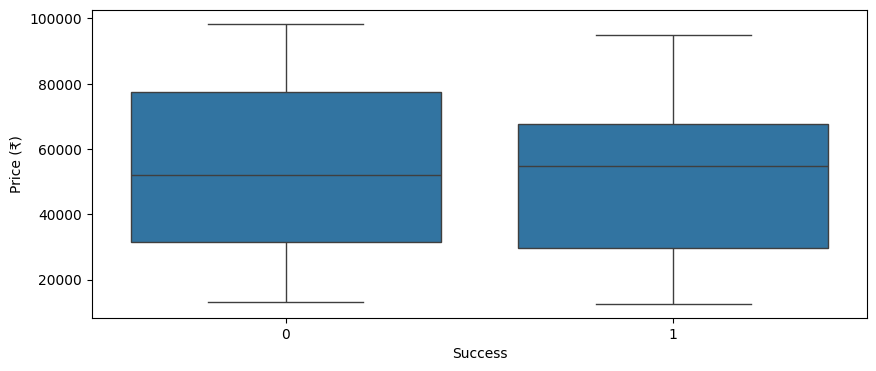

In [5]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="Success", y="Price (₹)", data=df)

plt.show()

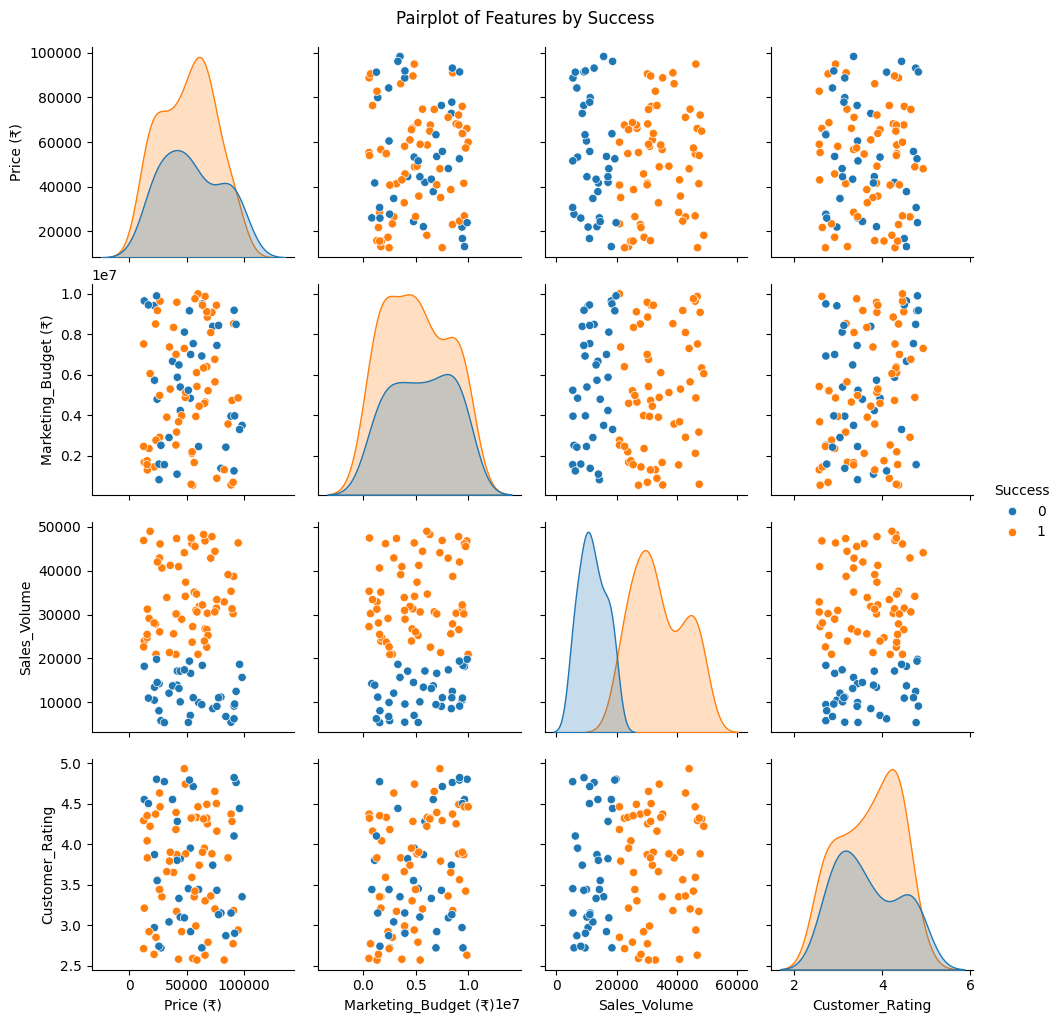

In [6]:
sns.pairplot(df, hue="Success", vars=["Price (₹)", "Marketing_Budget (₹)", "Sales_Volume", "Customer_Rating"])
plt.suptitle("Pairplot of Features by Success", y=1.02)
plt.show()

In [7]:
numeric_cols = df.select_dtypes(include=["number"]).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]
print(f"Rows before: {df.shape[0]}, Rows after: {df_no_outliers.shape[0]}")



Rows before: 100, Rows after: 100


In [9]:
# Create interaction features
df["Marketing_Sales"] = df["Marketing_Budget (₹)"] * df["Sales_Volume"]
df["Price_Rating"] = df["Price (₹)"] * df["Customer_Rating"]

# Normalize numerical columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

numerical_columns = [
    "Price (₹)",
    "Marketing_Budget (₹)",
    "Sales_Volume",
    "Customer_Rating",
    "RAM (GB)",
    "Battery_Capacity (mAh)",
    "Screen_Size (inches)",
]
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [14]:
# Define feature matrix and target variable
X = df.drop(columns=["Product_ID", "Model_Name", "Success"])
y = df["Success"]

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest with hyperparameter tuning
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation (k=5) for the Random Forest model
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
 
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate models
models = {
    "Random Forest": y_pred_rf,
    "Logistic Regression": y_pred_lr,
}

for name, y_pred in models.items():
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 40)


Random Forest Cross-Validation Accuracy: 1.0000 ± 0.0000
Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        16

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[ 4  0]
 [ 0 16]]
----------------------------------------
Model: Logistic Regression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        16

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[ 4  0]
 [ 0 16]]
----------------------------------------


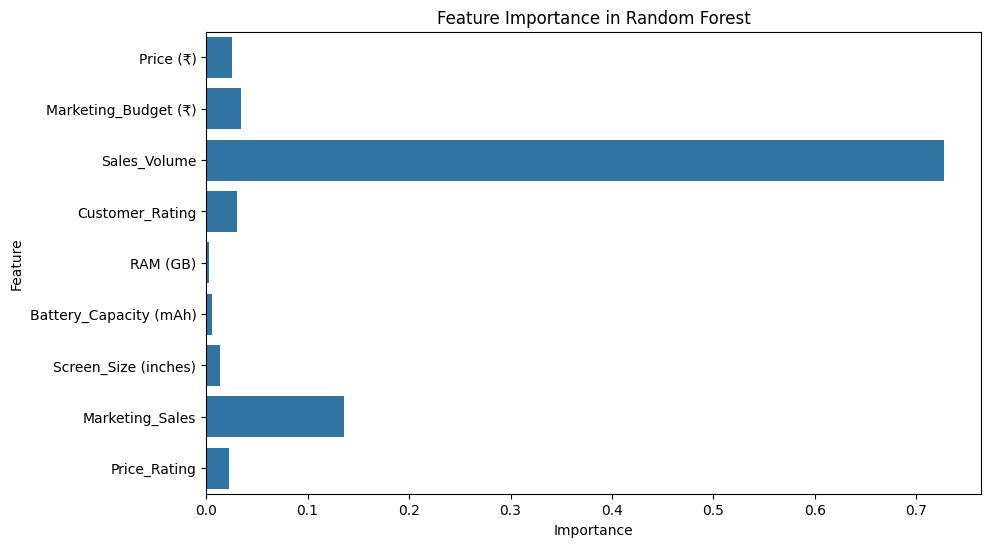

In [41]:
# Random Forest feature importance
import seaborn as sns
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\421133397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")


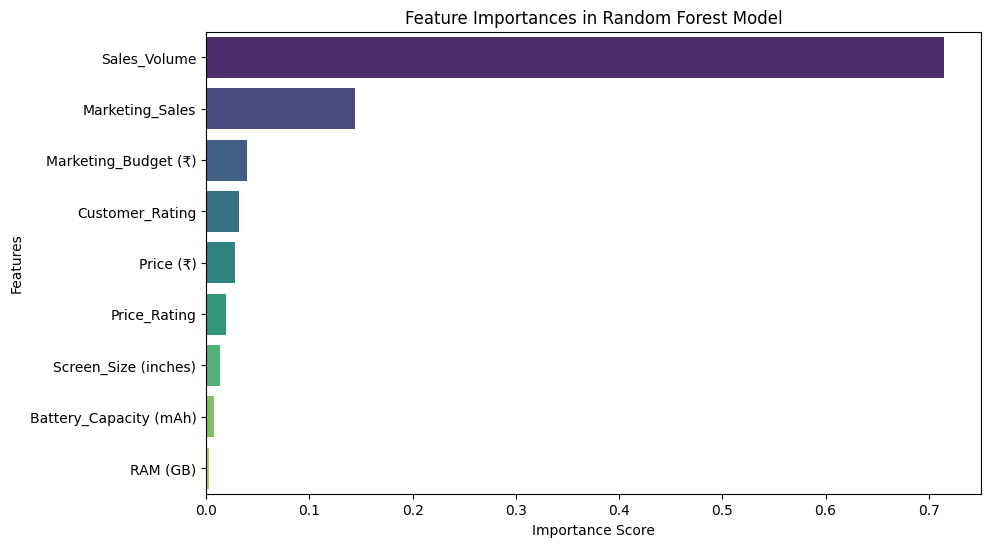

In [13]:
# Feature Importance Analysis
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort and plot feature importances
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")
plt.title("Feature Importances in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [42]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean()}")

# Hyperparameter tuning for Random Forest
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Cross-validation scores: [1.   1.   1.   0.95 1.  ]
Average CV Accuracy: 0.99
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 1.0


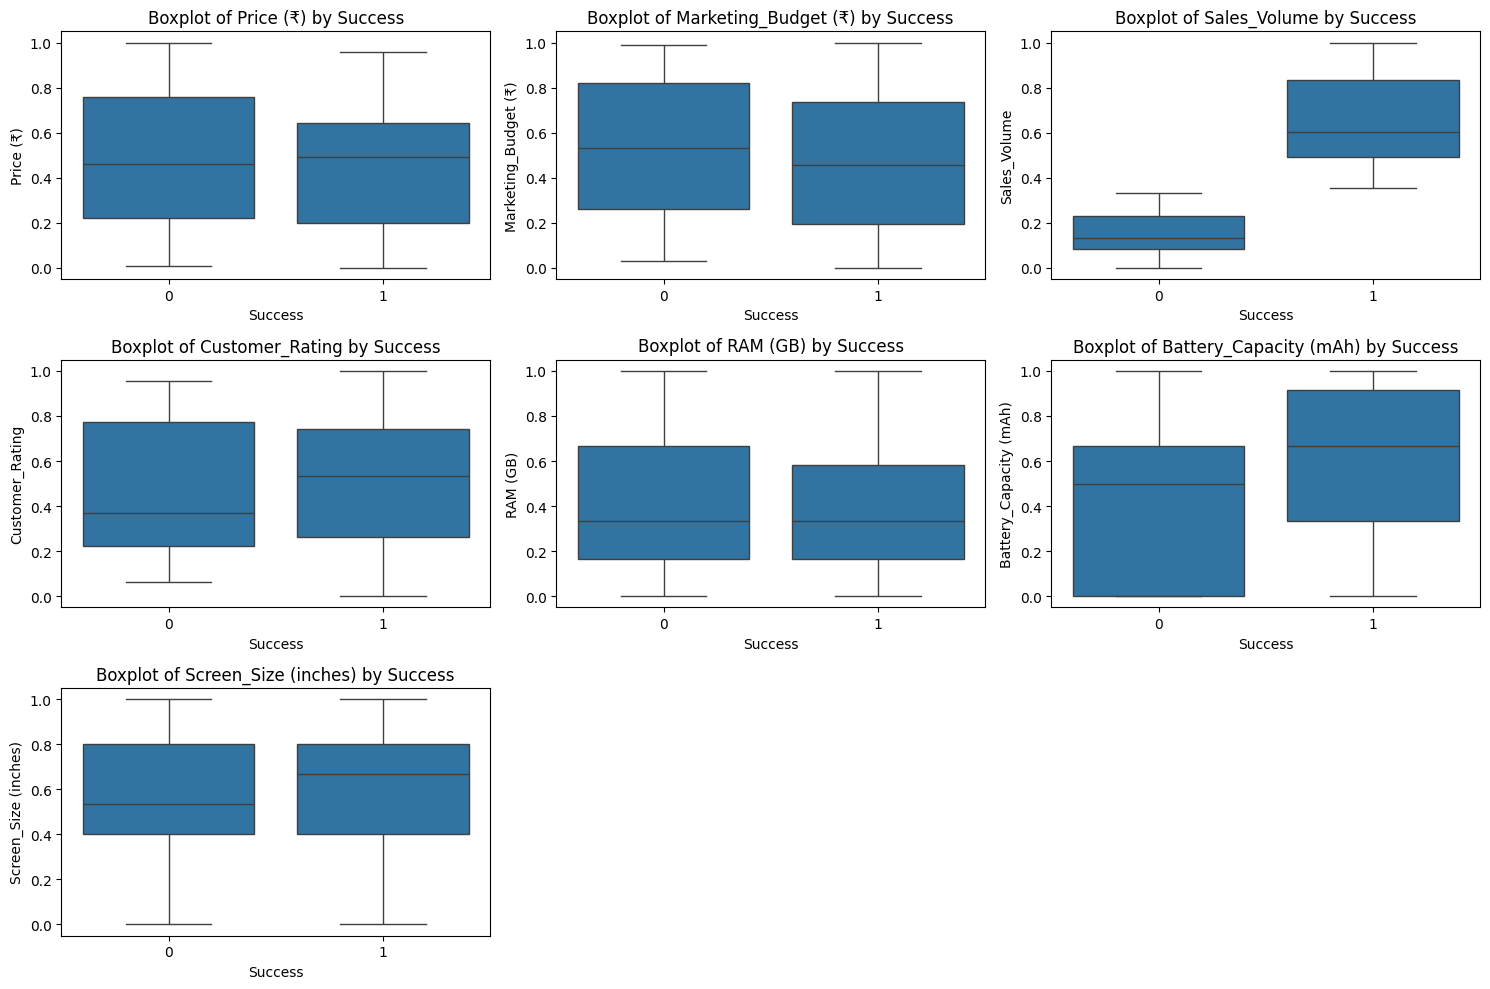

In [43]:
# Boxplots for success
features_to_plot = numerical_columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x="Success", y=feature)
    plt.title(f"Boxplot of {feature} by Success")
plt.tight_layout()
plt.show()


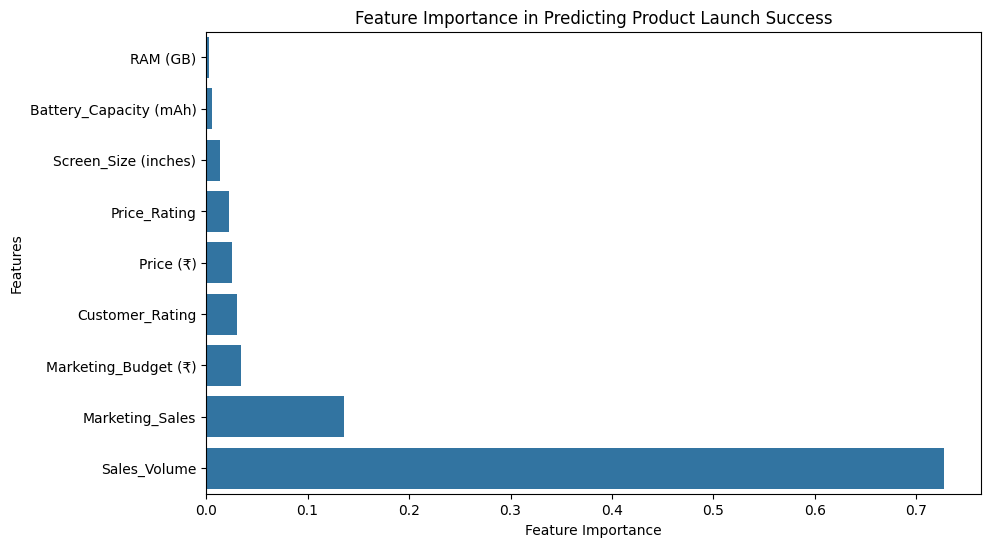

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort the feature importance
sorted_idx = np.argsort(importances)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx])
plt.title('Feature Importance in Predicting Product Launch Success')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


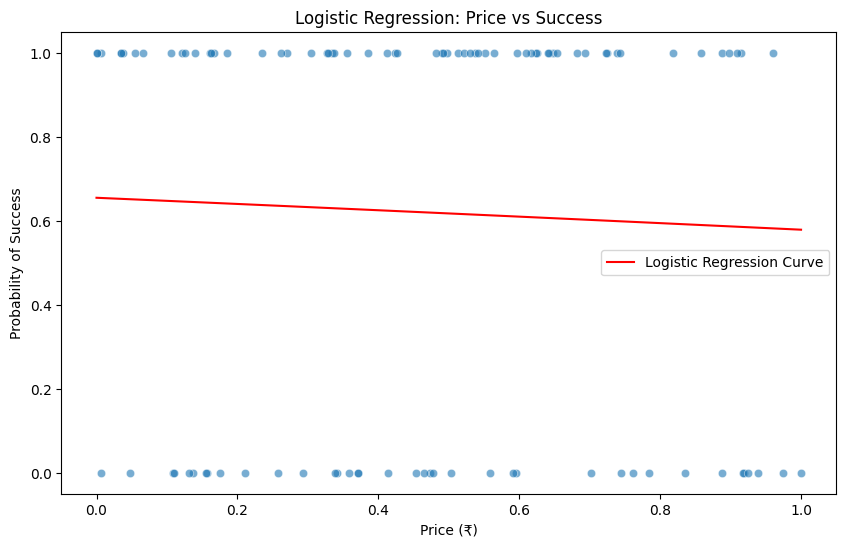

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Select 'Price (₹)' for the feature and 'Success' as the target
X = df[['Price (₹)']]  # Feature: Price (₹)
y = df['Success']  # Target: Success (0 or 1)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Create a range of 'Price (₹)' values for plotting the logistic curve
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predict probabilities (of success)
y_pred = model.predict_proba(X_range)[:, 1]  # Probability of success (class 1)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price (₹)', y='Success', data=df, alpha=0.6)
plt.plot(X_range, y_pred, color='red', label='Logistic Regression Curve')
plt.title('Logistic Regression: Price vs Success')
plt.xlabel('Price (₹)')
plt.ylabel('Probability of Success')
plt.legend()
plt.show()

